In [1]:
from numpy import array
from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Embedding
# define documents
docs = ['Well done!',
		'Good work',
		'Great effort',
		'nice work',
		'Excellent!',
		'Weak',
		'Poor effort!',
		'not good',
		'poor work',
		'Could have done better.']
# define class labels
labels = array([1,1,1,1,1,0,0,0,0,0])
# integer encode the documents
vocab_size = 50
encoded_docs = [one_hot(d, vocab_size) for d in docs]
print(encoded_docs)
# pad documents to a max length of 4 words
max_length = 4
padded_docs = pad_sequences(encoded_docs, maxlen=max_length, padding='post')
print(padded_docs)
# define the model
model = Sequential()
model.add(Embedding(vocab_size, 8, input_length=max_length))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))
# compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
# summarize the model
print(model.summary())
# fit the model
model.fit(padded_docs, labels, epochs=50, verbose=0)
# evaluate the model
loss, accuracy = model.evaluate(padded_docs, labels, verbose=0)
print('Accuracy: %f' % (accuracy*100))

[[16, 47], [37, 13], [20, 48], [25, 13], [49], [11], [48, 48], [29, 37], [48, 13], [29, 4, 47, 19]]
[[16 47  0  0]
 [37 13  0  0]
 [20 48  0  0]
 [25 13  0  0]
 [49  0  0  0]
 [11  0  0  0]
 [48 48  0  0]
 [29 37  0  0]
 [48 13  0  0]
 [29  4 47 19]]
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 4, 8)              400       
                                                                 
 flatten (Flatten)           (None, 32)                0         
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 433 (1.69 KB)
Trainable params: 433 (1.69 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Accuracy: 80.000001


Model 1 Architecture:
Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_10 (Embedding)    (None, 4, 8)              400       
                                                                 
 flatten_10 (Flatten)        (None, 32)                0         
                                                                 
 dense_19 (Dense)            (None, 1)                 33        
                                                                 
Total params: 433 (1.69 KB)
Trainable params: 433 (1.69 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Model 1 Accuracy: 80.00%
Model 2 Architecture:
Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_11 (Embedding)    (None, 4, 8)              400

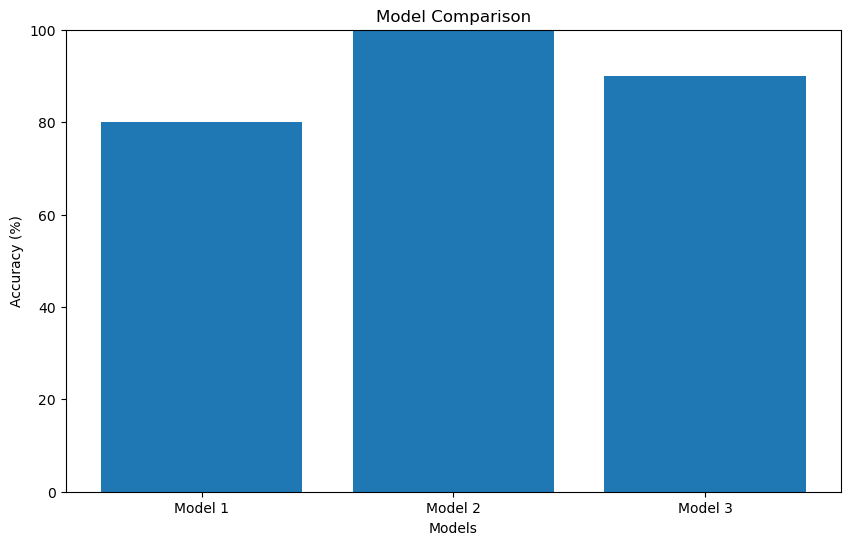

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import array
from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Embedding

# Define documents
docs = ['Well done!',
        'Good work',
        'Great effort',
        'nice work',
        'Excellent!',
        'Weak',
        'Poor effort!',
        'not good',
        'poor work',
        'Could have done better.']

# Define class labels
labels = array([1, 1, 1, 1, 1, 0, 0, 0, 0, 0])

# Integer encode the documents
vocab_size = 50
encoded_docs = [one_hot(d, vocab_size) for d in docs]

# Pad documents to a max length of 4 words
max_length = 4
padded_docs = pad_sequences(encoded_docs, maxlen=max_length, padding='post')

# Create three different model architectures
models = []

# Model 1: Original model
model1 = Sequential()
model1.add(Embedding(vocab_size, 8, input_length=max_length))
model1.add(Flatten())
model1.add(Dense(1, activation='sigmoid'))
models.append(model1)

# Model 2: Add an additional dense layer
model2 = Sequential()
model2.add(Embedding(vocab_size, 8, input_length=max_length))
model2.add(Flatten())
model2.add(Dense(16, activation='relu'))  # Additional dense layer
model2.add(Dense(1, activation='sigmoid'))
models.append(model2)

# Model 3: Increase the number of neurons in the dense layer
model3 = Sequential()
model3.add(Embedding(vocab_size, 8, input_length=max_length))
model3.add(Flatten())
model3.add(Dense(32, activation='relu'))  # More neurons in the dense layer
model3.add(Dense(1, activation='sigmoid'))
models.append(model3)

# Lists to store accuracy for each model
accuracies = []

# Train and evaluate each model
for i, model in enumerate(models):
    print(f"Model {i + 1} Architecture:")
    print(model.summary())

    # Compile the model
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    # Fit the model
    history = model.fit(padded_docs, labels, epochs=50, verbose=0)

    # Evaluate the model
    loss, accuracy = model.evaluate(padded_docs, labels, verbose=0)
    accuracies.append(accuracy * 100)
    print(f"Model {i + 1} Accuracy: {accuracy * 100:.2f}%")
    print("=" * 50)

# Plot the accuracies
plt.figure(figsize=(10, 6))
models_names = ["Model 1", "Model 2", "Model 3"]
plt.bar(models_names, accuracies)
plt.xlabel("Models")
plt.ylabel("Accuracy (%)")
plt.title("Model Comparison")
plt.ylim(0, 100)
plt.show()
